# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [5]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy 

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

<module 'citipy.citipy' from 'C:\\Users\\iezik\\Anaconda3\\lib\\site-packages\\citipy\\citipy.py'>


In [7]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []
countries = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    country = citipy.nearest_city(lat_lng[0], lat_lng[1]).country_code
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)
        countries.append(country.upper())

# Print the city count to confirm sufficient count
print(len(cities))

#Print the country count to confirm it matches city count
print(len(countries))

606
606


In [79]:
#test api on one city = "victoria". to see the keys and values in the data
# cities = "victoria"
# url = "http://api.openweathermap.org/data/2.5/weather?"
# query_url = f"{url}appid={weather_api_key}&q={city}"

# response = requests.get(query_url).json() # a dictionary with various information labels of the city
# print(response)

{'coord': {'lon': 30.6918, 'lat': 61.7053}, 'weather': [{'id': 600, 'main': 'Snow', 'description': 'light snow', 'icon': '13d'}], 'base': 'stations', 'main': {'temp': 266.83, 'feels_like': 262.19, 'temp_min': 266.83, 'temp_max': 266.83, 'pressure': 995, 'humidity': 97, 'sea_level': 995, 'grnd_level': 994}, 'visibility': 262, 'wind': {'speed': 2.65, 'deg': 232}, 'snow': {'1h': 0.16}, 'clouds': {'all': 100}, 'dt': 1612168228, 'sys': {'country': 'RU', 'sunrise': 1612160461, 'sunset': 1612188031}, 'timezone': 10800, 'id': 490466, 'name': 'Sortavala', 'cod': 200}


In [8]:
#Create a dataframe to store the data
city_weather = pd.DataFrame({'City': cities, 'Cloudiness': "", 'Country': countries, 'Date': "",
                            'Humidity': "", 'Lat': "", 'Lng': "", 'Max Temp': "", 'Windspeed': ""})

#Preview the dataframe
city_weather.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Windspeed
0,ostersund,,SE,,,,,,
1,ushuaia,,AR,,,,,,
2,tabuk,,SA,,,,,,
3,leningradskiy,,RU,,,,,,
4,bairiki,,KI,,,,,,


In [ ]:
### api calls and data collection while filitering the data in the calls to make sure all columns will have same length and adding it directly to dataframe

In [9]:
#Variables to keep track of response number
record_num = 1
record_set = 1

#Base url to make the api call
base_url = 'http://api.openweathermap.org/data/2.5/weather?units=imperial&q='

#Run the API call for each city
print('''
-----------------------------
Beginning Data Retrieval
-----------------------------''')
for index, row in city_weather.iterrows(): 
    #Create the query url for the API call
    query_url = base_url + row['City'] + ',' + row['Country'] + '&APPID=' + weather_api_key
    
    #API call
    response = requests.get(query_url).json()
    
    #Exception script in case the city is not found by the API call
    try: 
        #Meassage to alert the user that the data is being retrieved
        print(f'Processing Weather Data for Record {record_num} of Set {record_set} | {response["name"]}')
        
        #Input data into the dataframe
        city_weather.loc[index, 'Cloudiness'] = response['clouds']['all']
        city_weather.loc[index, 'Date'] = response['dt']
        city_weather.loc[index, 'Humidity'] = response['main']['humidity']
        city_weather.loc[index, 'Lat'] = response['coord']['lat']
        city_weather.loc[index, 'Lng'] = response['coord']['lon']
        city_weather.loc[index, 'Max Temp'] = response['main']['temp_max']
        city_weather.loc[index, 'Windspeed'] = response['wind']['speed']
        
        #Increase the record count
        record_num += 1
        
    except (KeyError, IndexError):
        print("City not found....Skipping............")
    
    #If statement to handle the API call limits
    if record_num == 51:
        record_set += 1
        record_num = 1
        time.sleep(60)
        
print('''
-----------------------------
Data Retrival Complete
-----------------------------''')


-----------------------------
Beginning Data Retrieval
-----------------------------
Processing Weather Data for Record 1 of Set 1 | Östersund
Processing Weather Data for Record 2 of Set 1 | Ushuaia
Processing Weather Data for Record 3 of Set 1 | Tabuk
Processing Weather Data for Record 4 of Set 1 | Leningradskiy
Processing Weather Data for Record 5 of Set 1 | Bairiki Village
Processing Weather Data for Record 6 of Set 1 | Hoquiam
Processing Weather Data for Record 7 of Set 1 | Atuona
Processing Weather Data for Record 8 of Set 1 | Worcester
Processing Weather Data for Record 9 of Set 1 | Busselton
Processing Weather Data for Record 10 of Set 1 | Warrnambool
Processing Weather Data for Record 11 of Set 1 | Ponta do Sol
Processing Weather Data for Record 12 of Set 1 | East London
Processing Weather Data for Record 13 of Set 1 | Coyhaique
Processing Weather Data for Record 14 of Set 1 | Rikitea
Processing Weather Data for Record 15 of Set 1 | Carnarvon
Processing Weather Data for Record

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [84]:
#Done Above        

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [10]:
# Dataframe created above before data extraction and was appended using iterrows()
#Clean dataframe to remove cities that were not found
city_weather['Max Temp'] = city_weather['Max Temp'].replace('', np.nan)
city_weather = city_weather.dropna()

#Save dataframe
city_weather.to_csv("C:/Users/iezik/Desktop/USC/usc-la-data-pt-12-2020-u-c/unit_06_python_apis/homework/starter_code/CityWeatherData.csv", index=False, header=True)

#Preview the dataframe
city_weather.head(10)

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Windspeed
0,ostersund,90,SE,1612384661,85,63.1792,14.6357,8.01,5.14
1,ushuaia,75,AR,1612384506,54,-54.8,-68.3,53.60,18.41
2,tabuk,75,SA,1612384517,32,28.3833,36.5833,69.80,5.75
3,leningradskiy,65,RU,1612384661,84,69.3833,178.417,-24.56,11.14
4,bairiki,20,KI,1612384662,83,1.3292,172.975,80.60,10.36
5,hoquiam,75,US,1612384662,81,46.9809,-123.889,48.00,1.48
6,atuona,1,PF,1612384662,72,-9.8,-139.033,77.95,11.83
7,worcester,0,ZA,1612384662,55,-33.6465,19.4485,66.38,6.04
8,busselton,0,AU,1612384663,81,-33.65,115.333,51.01,16.67
9,warrnambool,97,AU,1612384663,89,-38.3833,142.483,57.99,5.01


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [11]:
## inpection of humidity

city_weather['Humidity'].max()

# max humidity is 100 there is no city with humdity grater than 100 skipping to plotting 

100

## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

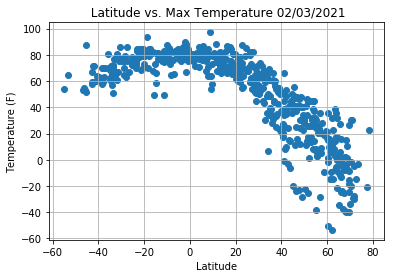

In [12]:
# Build a scatter plot for each data type
plt.scatter(city_weather["Lat"], city_weather["Max Temp"], marker="o")

# Incorporate the other graph properties
plt.title(f' Latitude vs. Max Temperature {time.strftime("%m/%d/%Y")}')
plt.ylabel("Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Show plot
plt.show()

## Latitude vs. Humidity Plot

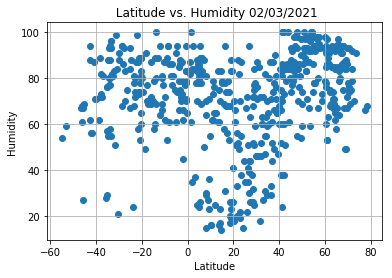

In [13]:
# Build a scatter plot for each data type
plt.scatter(city_weather["Lat"], city_weather["Humidity"], marker="o")

# Incorporate the other graph properties
plt.title(f' Latitude vs. Humidity {time.strftime("%m/%d/%Y")}')
plt.ylabel("Humidity")
plt.xlabel("Latitude")
plt.grid(True)

# Show plot
plt.show()

## Latitude vs. Cloudiness Plot

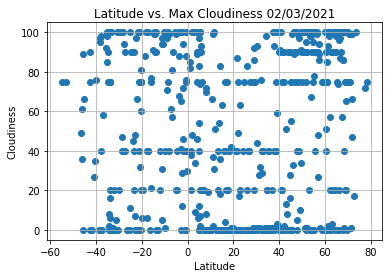

In [14]:
plt.scatter(city_weather["Lat"], city_weather["Cloudiness"], marker="o")

# Incorporate the other graph properties
plt.title(f'Latitude vs. Max Cloudiness {time.strftime("%m/%d/%Y")}')
plt.ylabel("Cloudiness")
plt.xlabel("Latitude")
plt.grid(True)

# Show plot
plt.show()

## Latitude vs. Wind Speed Plot

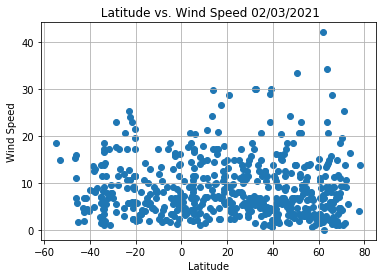

In [15]:
# Build a scatter plot for each data type
plt.scatter(city_weather["Lat"], city_weather["Windspeed"], marker="o")

# Incorporate the other graph properties
plt.title(f' Latitude vs. Wind Speed {time.strftime("%m/%d/%Y")}')
plt.ylabel("Wind Speed")
plt.xlabel("Latitude")
plt.grid(True)

# Show plot
plt.show()


## Linear Regression

In [27]:
# OPTIONAL: Create a function to create Linear Regression plots
def plot_linear_regression(x_values, y_values, title, text_coordinates):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r-")
    plt.annotate(line_eq,text_coordinates,fontsize=14,color="red")
    plt.xlabel("Latitude")
    plt.ylabel(title)
    print(f"The r-squared is: {rvalue}")
    plt.show()

In [25]:
# Create Northern and Southern Hemisphere DataFrames
northlat_df = city_weather.loc[city_weather["Lat"] >= 0,:]
southlat_df = city_weather.loc[city_weather["Lat"] < 0,:]

northlat_df.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Windspeed
0,ostersund,90,SE,1612384661,85,63.1792,14.6357,8.01,5.14
2,tabuk,75,SA,1612384517,32,28.3833,36.5833,69.80,5.75
3,leningradskiy,65,RU,1612384661,84,69.3833,178.417,-24.56,11.14
4,bairiki,20,KI,1612384662,83,1.3292,172.975,80.60,10.36
5,hoquiam,75,US,1612384662,81,46.9809,-123.889,48.00,1.48


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: -0.8724918830671772


C:\Users\iezik\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:2062: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
C:\Users\iezik\Anaconda3\lib\site-packages\matplotlib\axes\_base.py:248: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
C:\Users\iezik\Anaconda3\lib\site-packages\matplotlib\axes\_base.py:250: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = y[:, np.newaxis]


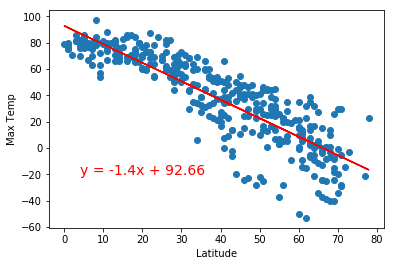

In [37]:
x_values = northlat_df["Lat"].astype('int')
y_values = northlat_df["Max Temp"].astype('int')
plot_linear_regression(x_values,y_values,'Max Temp',(4,-20))



####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.6124673708849403


C:\Users\iezik\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:2062: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
C:\Users\iezik\Anaconda3\lib\site-packages\matplotlib\axes\_base.py:248: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
C:\Users\iezik\Anaconda3\lib\site-packages\matplotlib\axes\_base.py:250: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = y[:, np.newaxis]


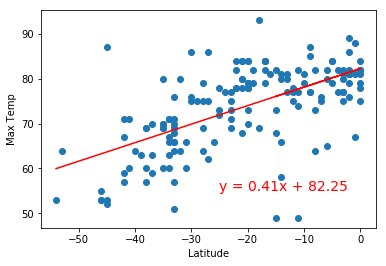

The high r value indicates a strong positive correlation between latitude and max temperature.


In [49]:
x_values = southlat_df["Lat"].astype('int')
y_values = southlat_df["Max Temp"].astype('int')
plot_linear_regression(x_values,y_values,'Max Temp',(-25,55))

print("The high r value indicates a strong positive correlation between latitude and max temperature.")

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.40745811403620213


C:\Users\iezik\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:2062: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
C:\Users\iezik\Anaconda3\lib\site-packages\matplotlib\axes\_base.py:248: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
C:\Users\iezik\Anaconda3\lib\site-packages\matplotlib\axes\_base.py:250: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = y[:, np.newaxis]


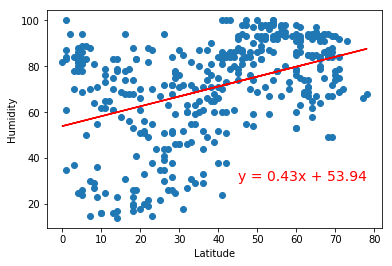

In [55]:
x_values = northlat_df["Lat"].astype('int')
y_values = northlat_df["Humidity"].astype('int')
plot_linear_regression(x_values,y_values,'Humidity',(45,30))


####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.12677348804641383


C:\Users\iezik\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:2062: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
C:\Users\iezik\Anaconda3\lib\site-packages\matplotlib\axes\_base.py:248: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
C:\Users\iezik\Anaconda3\lib\site-packages\matplotlib\axes\_base.py:250: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = y[:, np.newaxis]


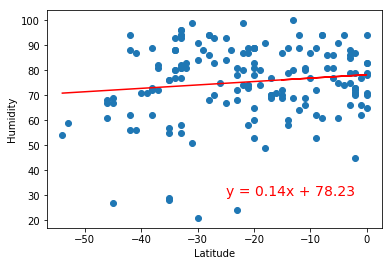

The low r values indicate a weak relationship between humidity and latitude.


In [58]:
x_values = southlat_df["Lat"].astype('int')
y_values = southlat_df["Humidity"].astype('int')
plot_linear_regression(x_values,y_values,'Humidity',(-25,30))

print("The low r values indicate a weak relationship between humidity and latitude.")

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.34521893183804936


C:\Users\iezik\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:2062: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
C:\Users\iezik\Anaconda3\lib\site-packages\matplotlib\axes\_base.py:248: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
C:\Users\iezik\Anaconda3\lib\site-packages\matplotlib\axes\_base.py:250: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = y[:, np.newaxis]


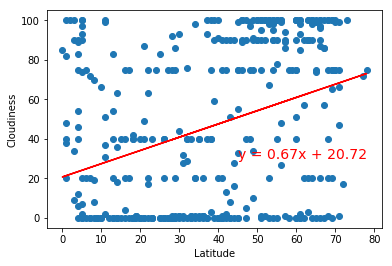

In [62]:
x_values = northlat_df["Lat"].astype('int')
y_values = northlat_df["Cloudiness"].astype('int')
plot_linear_regression(x_values,y_values,'Cloudiness',(45,30))


####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.13277011225653365


C:\Users\iezik\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:2062: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
C:\Users\iezik\Anaconda3\lib\site-packages\matplotlib\axes\_base.py:248: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
C:\Users\iezik\Anaconda3\lib\site-packages\matplotlib\axes\_base.py:250: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = y[:, np.newaxis]


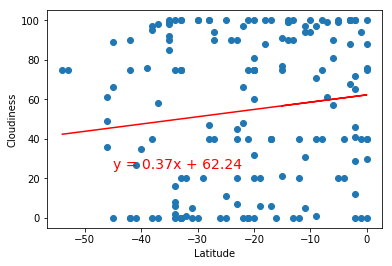

The low r values indicate a weak positive relationship between latitude and cloudiness.


In [65]:
x_values = southlat_df["Lat"].astype('int')
y_values = southlat_df["Cloudiness"].astype('int')
plot_linear_regression(x_values,y_values,'Cloudiness',(-45,25))

print("The low r values indicate a weak positive relationship between latitude and cloudiness.")

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: -0.0617480747890036


C:\Users\iezik\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:2062: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
C:\Users\iezik\Anaconda3\lib\site-packages\matplotlib\axes\_base.py:248: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
C:\Users\iezik\Anaconda3\lib\site-packages\matplotlib\axes\_base.py:250: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = y[:, np.newaxis]


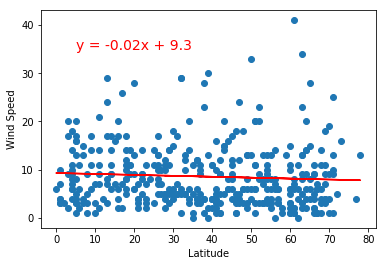

In [71]:
x_values = northlat_df["Lat"].astype('int')
y_values = northlat_df["Windspeed"].astype('int')
plot_linear_regression(x_values,y_values,'Wind Speed',(5,35))


####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: -0.047201198841990054


C:\Users\iezik\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:2062: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
C:\Users\iezik\Anaconda3\lib\site-packages\matplotlib\axes\_base.py:248: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
C:\Users\iezik\Anaconda3\lib\site-packages\matplotlib\axes\_base.py:250: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = y[:, np.newaxis]


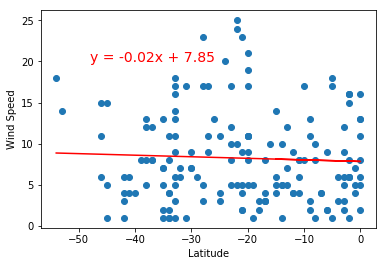

The low r values indicate that there is no real relationship between wind speed and latitude. The difference between the hemispheres doesn't seem to be significant enough to comment upon.


In [75]:
x_values = southlat_df["Lat"].astype('int')
y_values = southlat_df["Windspeed"].astype('int')
plot_linear_regression(x_values,y_values,'Wind Speed',(-48,20))

print("The low r values indicate that there is no real relationship between wind speed and latitude. The difference between the hemispheres doesn't seem to be significant enough to comment upon.")